# Lecture 4. Classification & Cross-validation

#### Regression & model complexity lectures recap

# Examples of supervised DS problems

## Iris Data Set
https://archive.ics.uci.edu/ml/datasets/Iris

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant

This is perhaps the best known database to be found in the pattern recognition literature. 

Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) 




** Inputs // Features // X**: Flower sizes  
  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  
<div style="width:25%; text-align:center">
<img src="http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png" width=500px>
</div>

The picture is taken from a very detailed [blogpost](http://sebastianraschka.com/Articles/2014_python_lda.html) on Linear Discriminant analysis

** Output // Target // Y**: Type of iris plant
 - Iris Setosa 
 - Iris Versicolour 
 - Iris Virginica
 
<div style="width:100%; text-align:center">
<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width=500px>
</div>

The picture is taken from a very detailed [blogpost](http://sebastianraschka.com/Articles/2014_python_lda.html) on Linear Discriminant analysis

##  Shuttle Landing Control Data Set
https://archive.ics.uci.edu/ml/datasets/Shuttle+Landing+Control

Determining the conditions under which an autolanding would be preferable to manual control of the spacecraft.

<div style="width:30%; text-align:center">
<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large92.jpg" width=500px>
</div>

** Inputs // Features // X**: Flight conditions  

2. STABILITY: stab, xstab 
3. ERROR: XL, LX, MM, SS 
4. SIGN: pp, nn 
5. WIND: head, tail 
6. MAGNITUDE: Low, Medium, Strong, OutOfRange 
7. VISIBILITY: yes, no



** Output // Target // Y**: Type of control

Auto or manual landing


## Mice Protein Expression Data Set
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

- The data set consists of the expression levels of 77 proteins that produced detectable signals in the nuclear fraction of cortex.
- There are 38 control mice and 34 trisomic mice (Down syndrome). 
- In the experiments, 15 measurements were registered of each protein per sample/mouse. 
- Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. So, the dataset contains a total of 1080 measurements per protein. 
- Each measurement can be considered as an independent sample/mouse. 

Classes: 
 - c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
 - c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
 - c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
 - c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 

 - t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
 - t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
 - t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
 - t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 

** Inputs // Features // X**: the expression levels of 77 proteins 

** Output // Target // Y**: Control or trisomy

## Exploring the *Titanic* dataset (continued)

<div style="width:100%; text-align:center">
<img src="http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" width=500px>
</div>

Kaggle has a nice [dataset](https://www.kaggle.com/c/titanic-gettingStarted) with information about passengers on the *Titanic*. It's meant as an introduction to predictive models -- here, predicting who survived the sinking. Let's explore it using [seaborn](http://stanford.edu/~mwaskom/software/seaborn/). This notebook mostly demonstrates features in development for version 0.3. Please [get in touch](https://github.com/mwaskom/seaborn/issues/new) if you have ideas for how they could be improved.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()  # apply seaborn appearance to all figures

from matplotlib import pyplot as plt
%matplotlib inline 

# ignore FutureWarning from sklearn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)
titanic["sex"] = titanic.sex.map({"male":0, "female":1})
titanic = pd.get_dummies(titanic, dummy_na=True, columns=['embarked',])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,0
3,1,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,0


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = titanic.drop('survived', axis=1)
y = titanic.survived

In [5]:
clf = KNeighborsClassifier()
clf.fit(X,  y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [6]:
print(X.count())

pclass          891
sex             891
age             714
sibsp           891
parch           891
fare            891
embarked_C      891
embarked_Q      891
embarked_S      891
embarked_nan    891
dtype: int64


In [62]:
# we have to remove NaN
X.dropna(axis=0, inplace=True)
print(X.count())
y = y[X.index].values

pclass          714
sex             714
age             714
sibsp           714
parch           714
fare            714
embarked_C      714
embarked_Q      714
embarked_S      714
embarked_nan    714
dtype: int64


In [69]:
clf = KNeighborsClassifier(n_neighbors=500)
clf.fit(X, y)
y_predicted = clf.predict(X)
print('Accuracy on the train set is {}'.format(accuracy_score(y, y_predicted)))

Accuracy on the train set is 0.5938375350140056


#### As we know, train accuracy isn't informative if we want to estimate the generalization ability of our model

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf.fit(X_train, y_train) 
y_predicted = clf.predict(X_train)
print('Accuracy of prediction on train set is {}'.format(accuracy_score(y_train, y_predicted)))

Accuracy of prediction on train set is 0.8158995815899581


In [121]:
y_predicted = clf.predict(X_test)
print('Accuracy of prediction on test set is {}'.format(accuracy_score(y_test, y_predicted)))

Accuracy of prediction on test set is 0.7627118644067796


#### Bias-variance tradeoff

<div style="width:100%; text-align:center">
<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" width=500px>
</div>

Check a great tutorial http://scott.fortmann-roe.com/docs/BiasVariance.html

### Lets try to reproduce model complexity curves
What is a measure of complexity for KNeighborsClassifier?

In [133]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


neighbors_range = range(1, 100, 1)

def _get_errors(clf):
    clf.fit(X_train, y_train)
    train_error = accuracy_score(y_train, clf.predict(X_train))
    test_error = accuracy_score(y_test, clf.predict(X_test))
    return train_error, test_error


train_error, test_error = zip(*[
    _get_errors(KNeighborsClassifier(n_neighbors=k))
    for k in neighbors_range
])

train_error_scaled, test_error_scaled = zip(*[
    _get_errors(make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k)))
    for k in neighbors_range
])

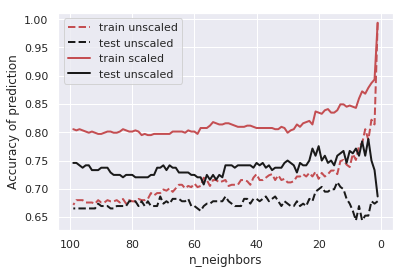

In [134]:
plt.plot(neighbors_range, train_error, '--r', lw=2, label='train unscaled')
plt.plot(neighbors_range, test_error, '--k', lw=2, label='test unscaled')
plt.plot(neighbors_range, train_error_scaled, 'r', lw=2, label='train scaled')
plt.plot(neighbors_range, test_error_scaled, 'k', lw=2, label='test unscaled')
plt.xlabel('n_neighbors')
plt.gca().invert_xaxis()
plt.ylabel('Accuracy of prediction')
plt.legend()

# Brief intro to classification algorithms

In [12]:
import seminar4_utils as utils # plot functions

## Logistic regression

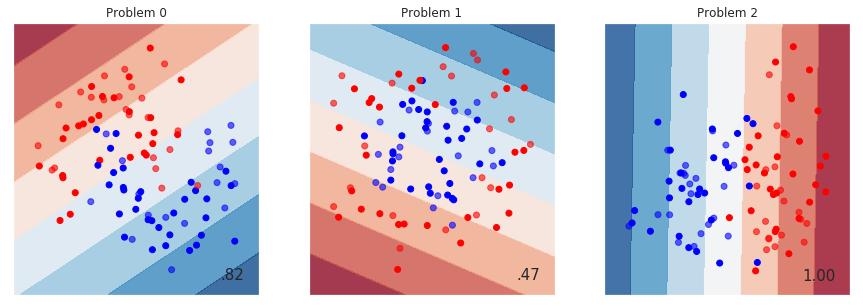

In [13]:
from sklearn.linear_model import LogisticRegression
utils.plot_clf(LogisticRegression());

## Sparcity

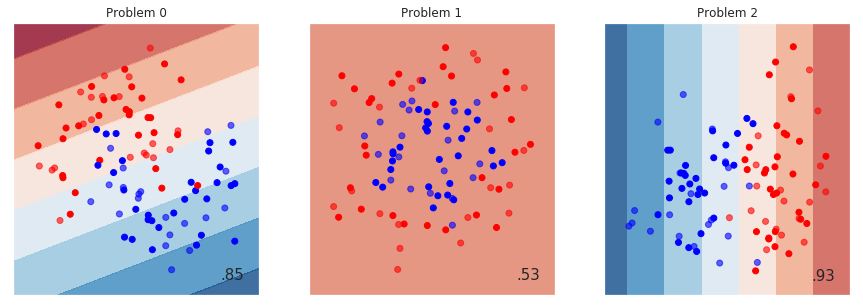

In [82]:
utils.plot_clf(LogisticRegression(C=1e-1, penalty='l1', solver='liblinear'))

## Support vector machine

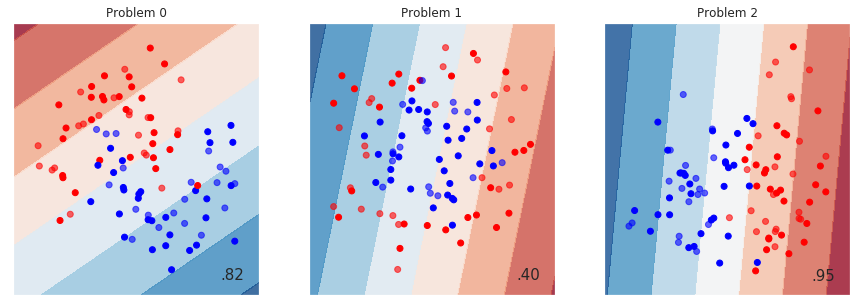

In [53]:
from sklearn.svm import SVC # SVC means Support Vector Classifier
utils.plot_clf(SVC(kernel='linear'))

** Kernel trick**. Main idea
* SVM builds a linear decision boundary in a feature space
* Some problems cannot be solved by a linear method (Problem 1 above)
* But what if we somehow transform our feature space?
* For example, use $x_1^2,\; x_1 x_2, \; x_2^2$ as features?

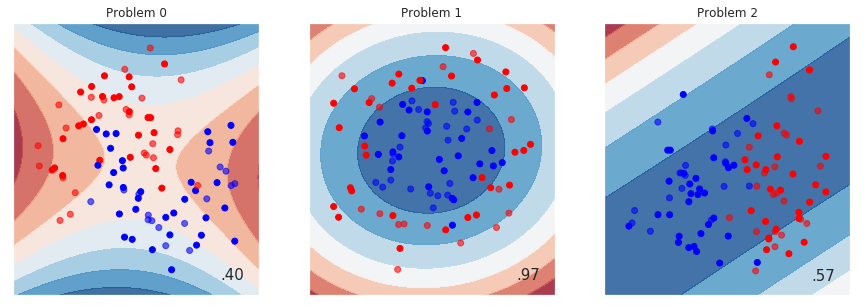

In [54]:
# reload(utils)
utils.plot_clf(SVC(kernel='poly', degree=2))

#### We can even use infinite-dimensional vector spaces!

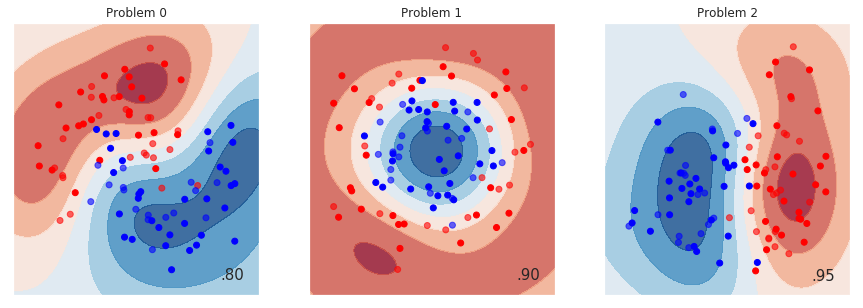

In [86]:
utils.plot_clf(SVC(kernel='rbf', C=10**0))

# Cross-validation

## Kfolds CV

Example of 5-fold

<div style="width:60%; text-align:center">
<img src="http://vinhkhuc.github.io/assets/2015-03-01-cross-validation/5-fold-cv.png">
</div>

## Seminar on classification: Mice Protein Expression Data Set
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
- The data set consists of the expression levels of 77 proteins that produced detectable signals in the nuclear fraction of cortex.
- There are 38 control mice and 34 trisomic mice (Down syndrome). 
- In the experiments, 15 measurements were registered of each protein per sample/mouse. 
- Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. So, the dataset contains a total of 1080 measurements per protein. 
- Each measurement can be considered as an independent sample/mouse. 

## Cross-validation: summary
- Do not estimate accuracy on the train set, use a separate validation set
- If your labels are ordered, don't forget to shuffle your data
- If you have any groups in your dataset, you have to use GroupKFold to estimate quality of your model

# Metrics for binary classification

## Precision & Recall
A wonderfull picture from Wikipedia
<div style="width:75%; text-align:center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" width=500px>
</div>


F1 = 2 \* (precision \* recall) / (precision + recall)

In [88]:
from sklearn.model_selection import cross_val_predict
# cross_val_predict internally do KFold cross-validation, calculate predictions on validation sets
# and then merge predictions into a single vector of predictions
from sklearn.metrics import classification_report
#classification_report gives several quality metrics. It can be used for multiclass problems

import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)


y_pred = cross_val_predict(LogisticRegressionCV(), X, y)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       424
           1       0.77      0.70      0.73       290

    accuracy                           0.79       714
   macro avg       0.79      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



# Let us explore precision & recall

<div style="width:100%; text-align:center">
<img src="./binary_classification.png">
</div>

## Precision-Recall curves

### A simpler figure

<img src="https://i.stack.imgur.com/65Rsd.jpg" width="450">


$$ 
Precision = \frac{TP}{TP + FP}, \quad Recall = \frac{TP}{TP + FN}
$$

In [136]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a simple classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

(0.0, 1.0)

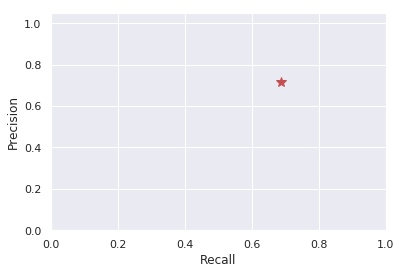

In [137]:
from sklearn.metrics import precision_score, recall_score

y_pred = clf.predict(X_test)
plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [138]:
y_pred = clf.predict(X_test)
print(y_pred[:5])

y_prob = clf.predict_proba(X_test)
# # Note that we used predict_proba instead of predict
print(y_prob[:5])

[0 1 0 1 1]
[[0.78591911 0.21408089]
 [0.38057803 0.61942197]
 [0.51100669 0.48899331]
 [0.34298117 0.65701883]
 [0.14877794 0.85122206]]


In [116]:
y_prob = y_prob[:, 1]

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.61')

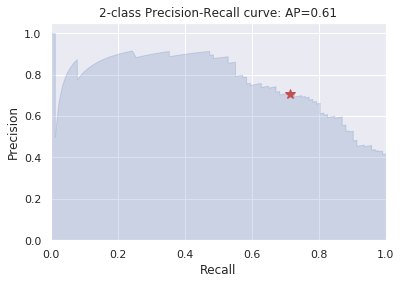

In [119]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2, where='post')

plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_score(y_test, y_pred)))

### *average_precision_score* can be used to calculate the "average" value from the curve

## ROC curves

### A simpler figure

<img src="https://i.stack.imgur.com/65Rsd.jpg" width="450">


$$ 
Precision = \frac{TP}{TP + FP}, \quad Recall = TPR = \frac{TP}{TP + FN}, \quad FPR = \frac{FP}{FP+TN}
$$

Text(0.5, 1.0, '2-class ROC curve: ROC AUC=0.89')

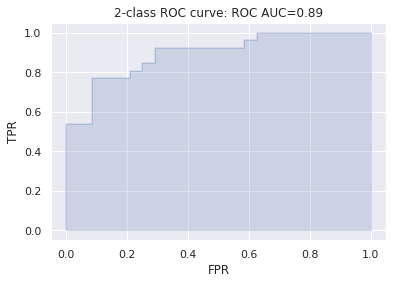

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.step(fpr, tpr, color='b', alpha=0.2,
         where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('2-class ROC curve: ROC AUC={0:0.2f}'.format(
          roc_auc_score(y_test, y_prob)))

##  SECOM Data Set
https://archive.ics.uci.edu/ml/datasets/SECOM

Data from a semi-conductor manufacturing process


In [39]:
# download inputs
import pandas as pd
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
X = pd.read_csv(path, sep=' ', header=None)

In [40]:
# We have several points with large number of NAs. Here we drop them
print(X.shape)
X.dropna(thresh=550, axis=0, inplace=True)
print(X.shape)
# drop columns with any NaN
X.dropna(axis=1, inplace=True)
print(X.shape)

(1567, 590)
(1432, 590)
(1432, 472)


In [41]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
y = pd.read_csv(path, sep=' ', header=None)[0]
y = y[X.index]
y = y == 1

In [42]:
y.value_counts()

False    1337
True       95
Name: 0, dtype: int64

#### TODO 1:
 - Import from sklearn.metrics accuracy, precision and recall scores; 
 - also import train_test_split from cross_validation 
 - split data into train & test parts

In [43]:
from sklearn.metrics import precision_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### TODO 2: estimate Precision, Recall on the train set


In [44]:
# these two lines block ConvergenceWarning. 
# Sometimes these warnings may be a useful indicator (e.g. if you don't normalize you data)
from sklearn.exceptions import ConvergenceWarning
simplefilter(action='ignore', category=ConvergenceWarning)

In [45]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Accuracy', accuracy_score(y_train, clf.predict(X_train)))
print('Precision', precision_score(y_train, clf.predict(X_train)))
print('Recall', recall_score(y_train, clf.predict(X_train)))

Accuracy 0.9395203336809176
Precision 0.5
Recall 0.017241379310344827


#### TODO 3: estimate Accuracy, Precision, Recall on the test set


In [46]:
print('Accuracy', accuracy_score(y_test, clf.predict(X_test)))
print('Precision', precision_score(y_test, clf.predict(X_test)))
print('Recall', recall_score(y_test, clf.predict(X_test)))

Accuracy 0.9217758985200846
Precision 0.0
Recall 0.0


/home/mikhail/.anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Awful results on the test set. Any ideas?

#### Probably, we can select better value of regularization parameter C
#### TODO 4: replace LogisticRegression by LogisticRegressionCV & check the results


In [47]:
# LogisticRegressionCV automatically selects C using embedded cross-validation
clf = LogisticRegressionCV()
clf.fit(X_train, y_train)

print('Accuracy', accuracy_score(y_test, clf.predict(X_test)))
print('Precision', precision_score(y_test, clf.predict(X_test)))
print('Recall', recall_score(y_test, clf.predict(X_test)))

Accuracy 0.9217758985200846
Precision 0.0
Recall 0.0


/home/mikhail/.anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### No progress

#### But, components of our data have significantly different ranges

In [48]:
X.max(0) - X.min(0)

8        0.4654
9        0.1221
10       0.0879
11       0.1073
12      89.9511
         ...   
577     92.3781
586      0.1197
587      0.0767
588      0.0276
589    737.3048
Length: 472, dtype: float64

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [50]:
clf = make_pipeline(StandardScaler(), LogisticRegressionCV(scoring='recall'))

# TODO 5: estimate quality metrics on both train and test sets
clf.fit(X_train, y_train)

print('Accuracy', accuracy_score(y_test, clf.predict(X_test)))
print('Precision', precision_score(y_test, clf.predict(X_test)))
print('Recall', recall_score(y_test, clf.predict(X_test)))

Accuracy 0.8710359408033826
Precision 0.2
Recall 0.21621621621621623


In [51]:
# both precision & recall values have been improved

# Links
 - [A blog post on cross validation](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html)
 - Also, check out two other posts from the same series "Model evaluation, model selection, and algorithm selection in machine learning": [The basics](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) and [Bootstrapping and uncertainties](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html)